In [10]:
import ast

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from jupyter_dash import JupyterDash
import dash_core_components as dcc 
import dash_html_components as html

from dash.dependencies import Input, Output

In [11]:
df = pd.read_table('data/pos_data_0706.csv', encoding='utf-16', header=[1,2,3,4,5], index_col=0)
df.columns.names = ('area', 'shop', 'class', 'product', 'type')
col_data = df.columns.to_frame()
col_data = col_data[['type', 'area', 'shop', 'class', 'product']].values
col_df = pd.DataFrame(col_data)
col_df = pd.MultiIndex.from_frame(col_df, names=['type', 'area', 'shop', 'class', 'product'])
df.columns = col_df
df = df.sort_index()
df_index = df['販売金額指数']
df_yoy = df["前年比（％）"]

In [12]:
pd.set_option('max_columns', 400)
df_index.tail()

area            00_全国                                                    \
shop       05_家電大型専門店                                                     
class         00_大分類計   70_家電                                             
product       00_中分類計 00_中分類計 71_カラーテレビ 72_パソコン  73_冷蔵庫  74_洗濯機 75_エアコン   
2020-06-07     181.18  181.18    138.10   94.87  160.64  162.54  321.16   
2020-06-14     203.27  203.27    152.13   95.02  180.42  178.73  374.83   
2020-06-21     179.44  179.44    160.56   99.07  178.18  179.26  265.96   
2020-06-28     183.98  183.98    171.05  107.42  192.71  193.22  247.39   
2020-07-05     167.59  167.59    166.22  107.43  187.20  184.30  193.05   

area                                                                    \
shop       01_スーパーマーケット                                                  
class           00_大分類計   10_食品                                          
product         00_中分類計 00_中分類計   11_主食  12_調味料 13_加工食品  14_菓子  15_嗜好品   
2020-06-07       110.17  113.31  111.91  120.39  112.11  94.20  144.09   
2020-06-14       107.06  110.28  108.66  116.69  109.49  91.28  140.95   
2020-06-21       112.87  114.16  111.69  122.25  113.46  95.74  141.52   
2020-06-28       108.03  110.82  110.48  115.92  110.19  91.94  139.35   
2020-07-05       108.75  111.78  111.54  117.39  111.78  93.12  134.19   

area                                                                        \
shop                                                                         
class        20_飲料                              30_雑貨                        
product    00_中分類計 21_嗜好飲料 22_清涼飲料 23_アルコール飲料 00_中分類計 31_オーラルケア 32_パーソナルケア   
2020-06-07  112.49   98.52  133.54     100.18   98.99     96.53      97.89   
2020-06-14  108.64   86.77  129.43      97.81   95.41     95.47      91.76   
2020-06-21  115.93   96.88  132.73     107.41  104.40    103.76      99.48   
2020-06-28  107.64   91.49  129.46      95.14  100.58    103.23      93.88   
2020-07-05  106.94   96.06  128.15      94.00  102.38    104.44      96.06   

area                                                                         \
shop                                                                          
class                                          40_化粧品                         
product    33_ハウスホールド 34_紙製品 35_その他雑貨  36_ペット 00_中分類計 41_基礎化粧品 42_メイクアップ化粧品   
2020-06-07     114.13  88.18    75.87   98.88   74.82    79.43        61.59   
2020-06-14     109.90  85.05    74.00   97.45   73.82    79.24        60.09   
2020-06-21     118.98  95.66    82.94  105.27   90.98   101.04        73.03   
2020-06-28     113.56  92.90    76.84  105.88   81.78    91.85        65.80   
2020-07-05     115.27  95.81    79.42  104.96   77.95    84.63        67.50   

area                                                                  \
shop                                                                   
class                50_ヘルスケア                          60_その他          
product    43_その他化粧品  00_中分類計  51_医薬品 52_健康関連品 53_ベビー 00_中分類計 61_たばこ   
2020-06-07     97.79   126.70   97.74   182.67  78.61   91.11  91.11   
2020-06-14     94.27   122.93  100.74   165.32  88.24   91.94  91.94   
2020-06-21    101.95   146.48  124.06   193.88  91.84   95.35  95.35   
2020-06-28     85.71   129.27  106.74   174.09  86.38   95.50  95.50   
2020-07-05     80.00   153.07  113.42   228.62  91.80   93.92  93.92   

area                                                                     \
shop       02_コンビニエンスストア                                                  
class            00_大分類計   10_食品                                          
product          00_中分類計 00_中分類計   11_主食  12_調味料 13_加工食品  14_菓子  15_嗜好品   
2020-06-07         99.10  106.99  101.63  112.44  153.81  82.45  139.02   
2020-06-14         98.05  106.26  102.73  110.48  153.09  82.52  131.99   
2020-06-21        101.15  110.17  105.80  112.58  156.96  88.22  134.48   
2020-06-28        100.68  109.94  106.82  109.98  157.71  87.42  131

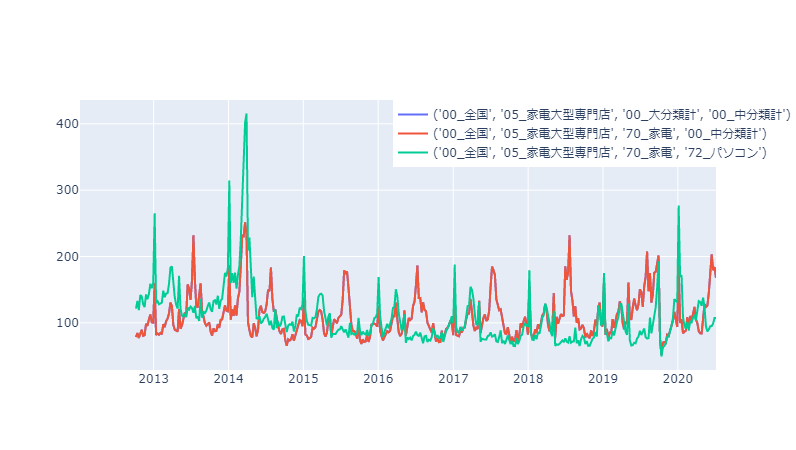

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_index.index, y=df_index[df_index.columns[0]], name=f'{df_index.columns[0]}'))
fig.add_trace(go.Scatter(x=df_index.index, y=df_index[df_index.columns[1]], name=f'{df_index.columns[1]}'))
fig.add_trace(go.Scatter(x=df_index.index, y=df_index[df_index.columns[3]], name=f'{df_index.columns[3]}'))

fig.show()

In [14]:
col_df.get_level_values(1).unique()

Index(['00_全国', '01_北海道', '02_東北', '03_関東', '04_中部', '05_近畿', '06_中国', '07_四国',
       '08_九州', '09_沖縄', '11_北海道・東北', '12_関東・甲越', '13_東海・北陸', '14_近畿',
       '15_中国・四国・九州・沖縄'],
      dtype='object', name='area')

In [15]:
app = JupyterDash(__name__)
app.config.suppress_callback_exceptions = True
app.layout = html.Div([
    
    dcc.RadioItems(
        id="my_radio",
        options = [{"label": col, "value": col} for col in col_df.get_level_values(0).unique()],
        value = col_df.get_level_values(0).unique()[0]
    ),
    
    
    html.Div(id="switch_layout")
    
], style={"width": 1200})

@app.callback(Output("switch_layout", "children"), 
              [Input("my_radio", "value")])
def update_graph(radio_select):
    if radio_select == "前年比（％）":
        yoy_layout = html.Div([
            
            dcc.Dropdown(
                id="my_dropdown2",
                options = [{"label": dat, 'value': dat} for dat in df_yoy.index],
                value = [df_yoy.index[-1]],
                multi=True
            ),
            
            dcc.Dropdown(
                id="select_area",
                options=[{"label": area_s, "value": area_s} for area_s in col_df.get_level_values(1).unique()],
                value = col_df.get_level_values(1).unique()[0],
                #multi = True
            ),
            
            dcc.Graph(id="my_graph2"),
            #html.Div(id="my_graph2")
            
        ])
        return yoy_layout
    else:
        index_layout = html.Div([
            
            dcc.Dropdown(
                id="my_dropdown",
                options = [{"label": f"{col}", 'value': f"{col}"} for col in df_index.columns],
                value = [f"{df_index.columns[0]}"],
                multi=True
            ),
            dcc.Graph(id="my_graph")
            
        ])
        return index_layout
    
@app.callback(Output("my_graph2", "figure"), [Input("my_dropdown2", "value"), Input("select_area", "value")])
def update_pct_graph(selected_date, selected_area):
    if selected_area == "00_全国":
        df_yoy_selected = df_yoy[df_yoy.index.isin(selected_date)]
        df_yoy_selected = df_yoy_selected[selected_area]
    
        fig = go.Figure()
        for i in range(len(df_yoy_selected)):
            fig.add_trace(go.Bar(x=df_yoy_selected.columns.get_level_values(-1), y=df_yoy_selected.iloc[i-1, :], name=df_yoy_selected.index[i-1]))
    
        return fig

@app.callback(Output("my_graph", "figure"), [Input("my_dropdown", "value")])
def update_index_graph(selected_value):
    fig = go.Figure()
    for val in selected_value:
        ast_value = ast.literal_eval(val)
        fig.add_trace(go.Scatter(x=df_index.index, y=df_index[ast_value], name=f"{ast_value[0]}/{ast_value[1]}/{ast_value[3]}"))
    fig.update_layout(height=800)
    return fig

app.run_server(mode="inline", port=8051)

In [22]:
import ast

In [28]:
t = ('00_全国', '05_家電大型専門店', '00_大分類計', '00_中分類計')

In [29]:
t[0]

'00_全国'

In [26]:
ast.literal_eval(test_list[0])

('00_全国', '05_家電大型専門店', '00_大分類計', '00_中分類計')

In [74]:
df_yoy.index[-30:]

Index(['2019-12-15', '2019-12-22', '2019-12-29', '2020-01-05', '2020-01-12',
       '2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
       '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
       '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
       '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
       '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05'],
      dtype='object')

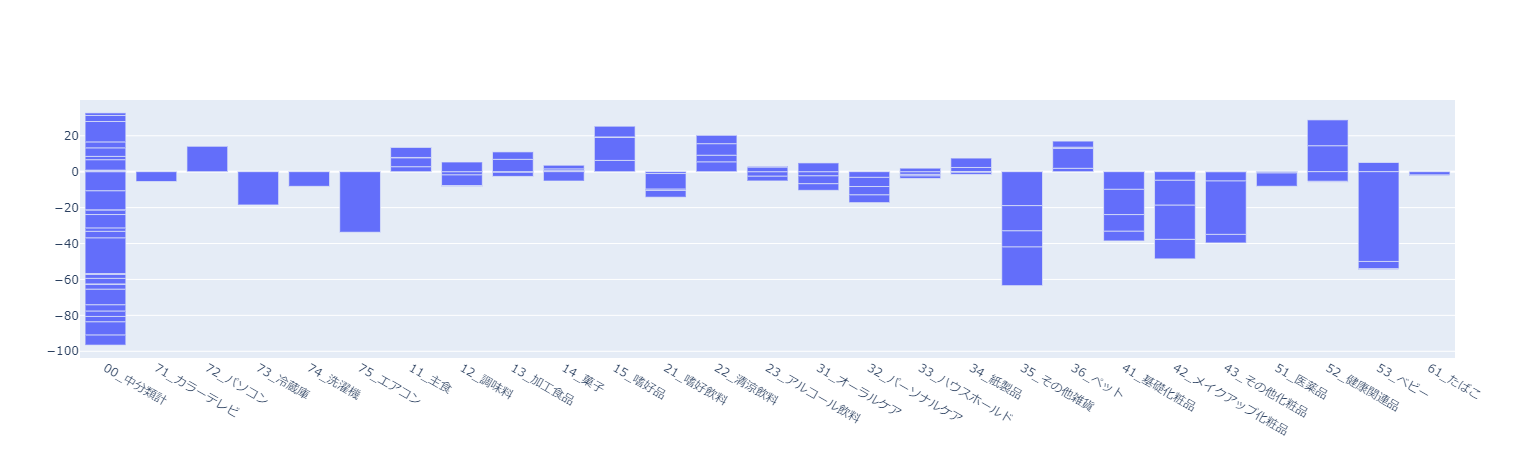

In [85]:
df_yoy_test = df_yoy[df_yoy.index.isin(['2019-12-15'])]
df_yoy_test = df_yoy_test[["00_全国"]]

fig1 = go.Figure()
for i in range(len(df_yoy_test)):
    fig1.add_trace(go.Bar(x=df_yoy_test.columns.get_level_values(-1), y=df_yoy_test.iloc[i-1, :], name=df_yoy_test.index[i-1]))
fig1.show()



In [73]:
pd.set_option('max_columns', 120)
df_yoy_test

area            00_全国                                                  \
shop       05_家電大型専門店                                                   
class         00_大分類計   70_家電                                           
product       00_中分類計 00_中分類計 71_カラーテレビ 72_パソコン 73_冷蔵庫 74_洗濯機 75_エアコン   
2020-06-14      70.97   70.97     37.58   24.55  46.86  42.14  142.41   
2020-07-05      15.04   15.04     25.14   31.60  25.11  19.03   -4.55   

area                                                                       \
shop       01_スーパーマーケット                                                     
class           00_大分類計   10_食品                                     20_飲料   
product         00_中分類計 00_中分類計 11_主食 12_調味料 13_加工食品 14_菓子 15_嗜好品 00_中分類計   
2020-06-14         1.13    2.25  1.24   3.55    2.30 -6.49  15.95    2.01   
2020-07-05         4.05    5.23  3.39   7.94    6.61  1.40   3.03    2.81   

area                                                                           \
shop                                                                            
class                                   30_雑貨                                   
product    21_嗜好飲料 22_清涼飲料 23_アルコール飲料 00_中分類計 31_オーラルケア 32_パーソナルケア 33_ハウスホールド   
2020-06-14   -1.34   10.26      -4.12   -3.02    -10.94       1.63       2.43   
2020-07-05   11.34    0.65       3.57    1.08     -3.57       0.22       2.74   

area                                                                       \
shop                                                                        
class                              40_化粧品                                   
product    34_紙製品 35_その他雑貨 36_ペット 00_中分類計 41_基礎化粧品 42_メイクアップ化粧品 43_その他化粧品   
2020-06-14  -10.3     4.84  -9.34  -21.15   -15.93       -34.08     -4.78   
2020-07-05    0.4     4.85  -0.18  -20.02   -16.02       -29.47     -7.22   

area                                                                     \
shop                                                      02_コンビニエンスストア   
class      50_ヘルスケア                         60_その他              00_大分類計   
product     00_中分類計 51_医薬品 52_健康関連品 53_ベビー 00_中分類計 61_たばこ       00_中分類計   
2020-06-14    20.53  -3.92    69.28 -13.19   -6.25  -6.25         -8.59   
2020-07-05    54.20  14.72   132.70 -13.58   -0.47  -0.47         -6.31   

area                                                                    \
shop                                                                     
class        10_食品                                       20_飲料           
product    00_中分類計  11_主食 12_調味料 13_加工食品  14_菓子 15_嗜好品 00_中分類計 21_嗜好飲料   
2020-06-14  -10.65 -15.81  -2.00   -2.61 -19.77  11.31   -5.40  -15.67   
2020-07-05   -9.79 -12.17  -5.81    1.83 -12.04 -10.86   -9.67   -1.99   

area                                                                          \
shop                                                                           
class                           30_雑貨                                          
product    22_清涼飲料 23_アルコール飲料 00_中分類計 31_オーラルケア 32_パーソナルケア 33_ハウスホールド 34_紙製品   
2020-06-14   -5.79      -4.12   -7.84    -27.00      -1.07      -1.44 -11.71   
2020-07-05  -10.79      -6.48  -11.56    -18.66     -17.26      -3.48  -2.62   

area                                                                         \
shop                                                                          
class                       40_化粧品                                 50_ヘルスケア   
product    35_その他雑貨 36_ペット 00_中分類計 41_基礎化粧品 42_メイクアップ化粧品 43_その他化粧品  00_中分類計   
2020-06-14   -10.15  -3.13  -33.89   -30.26       -45.31    -20.29    84.01   
2020-07-05   -18.99   5.20  -33.46   -26.86       -40.40    -28.92   136.17   

area                                                                       \
shop                                             03_ホームセンター                 
class                              60_その他           00_大分類計   10_食品         
product    51_医薬品 52_健康関連品 53_ベビー 00_中分類計 61_たばこ    00_中分類計 00_中分

In [70]:
df_yoy.index.isin(['2020-06-14', '2020-07-06'])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [107]:
df.shape

(444, 746)

In [108]:
df_index = df['販売金額指数']

In [110]:
df_index_zenkoku = df_index['00_全国']

In [111]:
df_index_shop = 

2          05_家電大型専門店                                                    \
3             00_大分類計   70_家電                                             
4             00_中分類計 00_中分類計 71_カラーテレビ 72_パソコン  73_冷蔵庫  74_洗濯機 75_エアコン   
5              販売金額指数  販売金額指数    販売金額指数  販売金額指数  販売金額指数  販売金額指数  販売金額指数   
2020-07-05     167.59  167.59    166.22  107.43  187.20  184.30  193.05   
2020-06-28     183.98  183.98    171.05  107.42  192.71  193.22  247.39   
2020-06-21     179.44  179.44    160.56   99.07  178.18  179.26  265.96   
2020-06-14     203.27  203.27    152.13   95.02  180.42  178.73  374.83   
2020-06-07     181.18  181.18    138.10   94.87  160.64  162.54  321.16   
...               ...     ...       ...     ...     ...     ...     ...   
2012-02-05        NaN     NaN       NaN     NaN     NaN     NaN     NaN   
2012-01-29        NaN     NaN       NaN     NaN     NaN     NaN     NaN   
2012-01-22        NaN     NaN       NaN     NaN     NaN     NaN     NaN   
2012-01-15        NaN     NaN       NaN     NaN     NaN     NaN     NaN   
2012-01-08        NaN     NaN       NaN     NaN     NaN     NaN     NaN   

2          01_スーパーマーケット                  ... 04_ドラッグストア                  \
3               00_大分類計   10_食品          ...      30_雑貨          40_化粧品   
4               00_中分類計 00_中分類計   11_主食  ...   35_その他雑貨  36_ペット 00_中分類計   
5                販売金額指数  販売金額指数  販売金額指数  ...     販売金額指数  販売金額指数  販売金額指数   
2020-07-05       108.75  111.78  111.54  ...      87.43  136.73   93.11   
2020-06-28       108.03  110.82  110.48  ...      87.10  137.87  100.35   
2020-06-21       112.87  114.16  111.69  ...      92.80  135.11   98.26   
2020-06-14       107.06  110.28  108.66  ...      85.09  125.95   84.91   
2020-06-07       110.17  113.31  111.91  ...      89.76  126.99   96.23   
...                 ...     ...     ...  ...        ...     ...     ...   
2012-02-05        98.01  101.46  102.08  ...     191.22   90.26   92.57   
2012-01-29        93.69   97.00   98.33  ...     188.93   95.22   99.28   
2012-01-22        90.77   93.21   94.83  ...     150.06   86.03   82.18   
2012-01-15        92.35   95.28   95.28  ...     158.81   87.71   86.40   
2012-01-08        88.14   86.70   88.22  ...     133.17   74.56   80.73   

2                                                                            
3                                          50_ヘルスケア                          
4          41_基礎化粧品 42_メイクアップ化粧品 43_その他化粧品  00_中分類計 51_医薬品 52_健康関連品  53_ベビー  
5            販売金額指数       販売金額指数    販売金額指数   販売金額指数 販売金額指数   販売金額指数  販売金額指数  
2020-07-05   102.88        83.01     87.41    86.92  69.93   149.59   92.80  
2020-06-28   112.38        86.17     96.87    85.20  70.43   139.15   93.66  
2020-06-21   107.45        82.73    105.05    85.99  71.88   137.87   91.77  
2020-06-14    89.21        71.42    100.59    75.80  63.76   119.24   86.32  
2020-06-07   102.65        79.10    113.60    81.34  67.15   133.75   85.74  
...             ...          ...       ...      ...    ...      ...     ...  
2012-02-05    96.33        86.99     93.83    87.23  80.36   109.27  110.70  
2012-01-29   104.45        95.39     93.32    88.37  81.34   110.50  115.07  
2012-01-22    84.01        78.10     85.50    78.98  73.15    96.70  105.30  
2012-01-15    87.02        81.16     95.33    84.86  79.66   100.40  109.89  
2012-01-08    77.19        81.85     87.88    80.25  76.90    88.94  105.01  

[444 rows x 115 columns]